# **Stroke Prediction using Machine Learning**

### **Project Description**

In this project, the goal is to predict whether a person is likely to have a stroke based on the individual's medical and demographic information. Strokes are one of the leading causes of disability and death worldwide, making early prediction crucial for timely intervention and treatment. Using machine learning algorithms, we aim to develop a model that can identify key risk factors such as age, blood pressure, glucose levels, and lifestyle habits, and predict the likelihood of a stroke.

The project involves collecting relevant health data from patients, preprocessing it, and training machine learning models to make accurate predictions. By leveraging algorithms like Logistic Regression and Random Forests, this model will help healthcare providers identify high-risk individuals, ultimately contributing to preventive healthcare measures and reducing the overall stroke incidence.

### **Project Objectives:**





1. Data Collection and Preprocessing: Collect a comprehensive dataset that includes patient medical history, lifestyle factors, and demographic details.Clean, preprocess, and transform the data (e.g., handling missing values, normalizing features, encoding categorical variables) to make it suitable for machine learning models.

1.   Feature Selection: Identify and select the most relevant features (age, BMI, hypertension, smoking status, etc.) that have the strongest correlation with stroke risk.

1.   Model Development: Build and train multiple machine learning models (e.g., Logistic Regression, Random Forest, Support Vector Machine, Gradient Boosting) to predict the likelihood of a stroke based on patient input data.
2.   Model Evalution : Evaluate the performance of the models using key metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to determine the best-performing model.

5.   Prediction and Interpretation: Develop a final predictive model that can accurately classify whether a patient is at risk of having a stroke.Provide insights into which features (e.g., glucose levels, hypertension) contribute most to the model’s predictions, offering interpretability for medical practitioners.








### **Data Description**

Following is the Data Dictionary for healthcare-dataset-stroke-data:-

*   gender- Male or Female
*   Age- Patient's age

*   hypertension- Whether the patient's is having hypertension or not
*   heart_disease- Whether the patient's have heart disease or not.

*   ever_married - Patient's is married or not
*   work_type - Patient's working sector


*   Residence_type- Patient's residence type ie;Urban or Rural

*  avg_glucose_level - Patient's glucose level


*   bmi - Patient's Body mass index values
*   smoking_status - Whether the Patient smoke or not



*  stroke - Have stroke or not















### **Import Libraries**

In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Load the Dataset

In [116]:
df=pd.read_csv('stroke_data.csv')
print(df.head(1))
print(df.shape)
df1=df.copy()#copying the original dataset

     id gender   age  hypertension  ...  avg_glucose_level   bmi   smoking_status stroke
0  9046   Male  67.0             0  ...             228.69  36.6  formerly smoked      1

[1 rows x 12 columns]
(5110, 12)


## Data Preprocessing

In [117]:
df.isnull().sum()
df.dropna(inplace=True)
print(df.shape)
df.head()
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df['work_type']=le.fit_transform(df['work_type'])
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['smoking_status']=le.fit_transform(df['smoking_status'])
df.head()
print(df.columns)



(4909, 12)
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


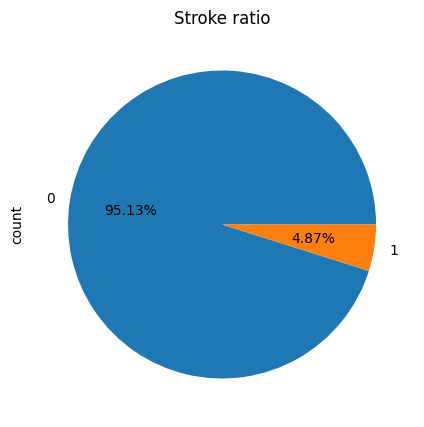

In [118]:
spread = df1['stroke'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%')
plt.title(f'Stroke ratio')

# Display the Chart
plt.show()

## **What is/are the insight(s) found from the chart?**

From the above chart, we got to know that the dataset contain 4.87% of patient's have stroke and 95.13% are not having stroke.

# **Logistic Regression Modeling**


Confusion Matrix:


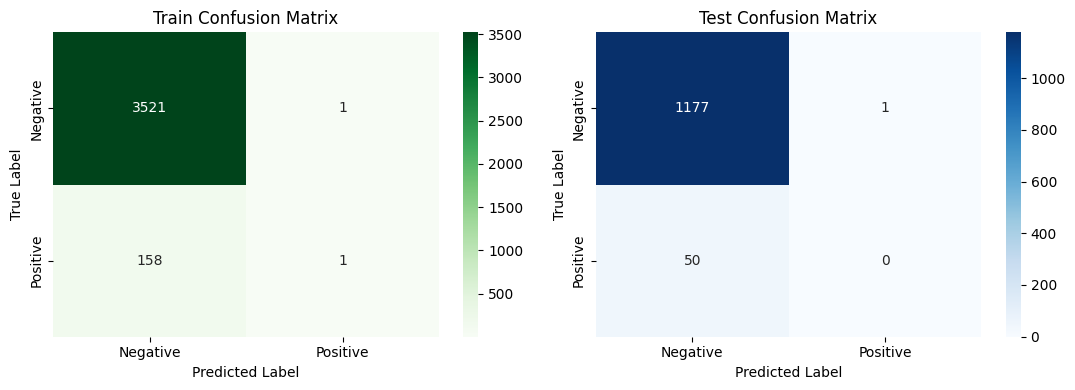


Train Classification Report:
|              |   precision |     recall |   f1-score |     support |
|:-------------|------------:|-----------:|-----------:|------------:|
| 0            |    0.957054 | 0.999716   |  0.97792   | 3522        |
| 1            |    0.5      | 0.00628931 |  0.0124224 |  159        |
| accuracy     |    0.956805 | 0.956805   |  0.956805  |    0.956805 |
| macro avg    |    0.728527 | 0.503003   |  0.495171  | 3681        |
| weighted avg |    0.937311 | 0.956805   |  0.936215  | 3681        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.95925  | 0.999151 |   0.978794 | 1178        |
| 1            |    0        | 0        |   0        |   50        |
| accuracy     |    0.958469 | 0.958469 |   0.958469 |    0.958469 |
| macro avg    |    0.479625 | 0.499576 |   0.489397 | 1228        |
| weighted avg |    0.920193 |

In [119]:

X=df.drop('stroke',axis=1)
y=df['stroke']
#Split the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=74)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model=LogisticRegression()
model.fit(X_train,y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
pred_prob_train = model.predict_proba(X_train)[:,1]
pred_prob_test = model.predict_proba(X_test)[:,1]


# calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
fig, ax = plt.subplots(1, 2, figsize=(11,4))
print("\nConfusion Matrix:")
sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Greens", fmt='.4g', ax=ax[0])
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")
ax[0].set_title("Train Confusion Matrix")

sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Blues", fmt='.4g', ax=ax[1])
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
ax[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.show()

# calculate classification report
cr_train = classification_report(y_train, y_pred_train, output_dict=True)
cr_test = classification_report(y_test, y_pred_test, output_dict=True)
print("\nTrain Classification Report:")
crt = pd.DataFrame(cr_train).T
print(crt.to_markdown())
print("\nTest Classification Report:")
crt2 = pd.DataFrame(cr_test).T
print(crt2.to_markdown())


print(df.tail(2))


In [124]:
df.tail(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0
5109,44679,0,44.0,0,0,1,0,1,85.28,26.2,0,0
